In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.optimize as opt
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

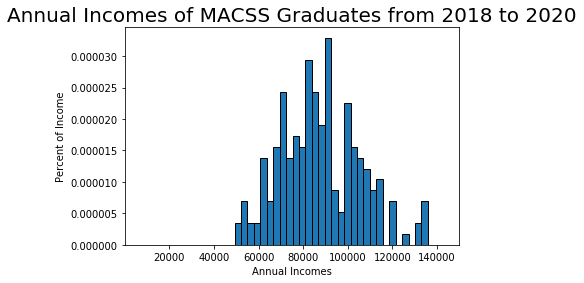

In [2]:
# (1)

incomes = np.loadtxt('data/incomes.txt')
num_bins = 30
plt.hist(incomes, num_bins, edgecolor='k', normed=True)
plt.title("Annual Incomes of MACSS Graduates from 2018 to 2020",
         fontsize=20)
plt.xlabel("Annual Incomes")
plt.ylabel("Percent of Income")
plt.xlim([1, 150000])
plt.show()

In [3]:
# b

def trunc_lognorm_pdf(x, mu, sigma, cut_lb, cut_ub):
    if cut_lb == 'None' and cut_ub == 'None':
        prob_notcut = 1.0
    elif cut_lb != 'None' and cut_ub == 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb,s= sigma, scale=np.exp(mu))
    elif cut_lb == 'None' and cut_ub != 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s= sigma, scale=np.exp(mu))
    elif cut_lb != 'None' and cut_ub != 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale= np.exp(mu))- sts.lognorm.cdf(cut_lb, s=sigma, scale= np.exp(mu))
    pdf_vals = ((1/(x*sigma * np.sqrt(2*np.pi))* np.exp(-(np.log(x)-mu)**2 / (2*sigma**2)))
                 / prob_notcut)
    return pdf_vals



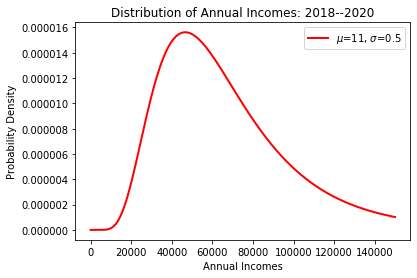

In [4]:
dist_incomes = np.linspace(0, 150000, 5000)
mu0, sigma0 = 11, 0.5
#plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu0, sigma0, 1, 150000),linewidth=2, color='r', label='$\mu=$11, $\sigma=$0.5')
plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu0, sigma0, 1, 150000), linewidth = 2, color = 'r', label = '$\mu$=11, $\sigma$=0.5')
plt.title('Distribution of Annual Incomes: 2018--2020')
plt.xlabel('Annual Incomes')
plt.ylabel('Probability Density')
plt.legend(loc = 'upper right')
plt.show()

In [6]:
def log_lik_log_norm(xs, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_lognorm_pdf(xs, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

print('log-likelihood:', log_lik_log_norm(incomes, mu0, sigma0, 0, 150000))

log-likelihood: -2379.120591931827


In [7]:
# (c)
def crit(params, *args):
    mu, sigma = params
    xs, lb, ub =args
    log_lik_val = log_lik_log_norm(xs, mu, abs(sigma), lb, ub)
    neg_log_lik_val = - log_lik_val
    
    return neg_log_lik_val

mu_init, sigma_init = 11, 0.5
params_init = np.array([mu_init, sigma_init])
mle_args = (incomes, 0, 150000)
res_uncstr = opt.minimize(crit, params_init, args = (mle_args))

mu_MLE, sigma_MLE = res_uncstr.x
MLE = log_lik_log_norm(incomes, mu_MLE, sigma_MLE, 0, 150000)
Hess = res_uncstr.hess_inv

print('MLE for mu:', mu_MLE)
print('MLE for sigma:', sigma_MLE)
print('Value of the likelihood function:', MLE)
print('The inverse Hessian matrix:', Hess)

MLE for mu: 11.361699972314367
MLE for sigma: 0.21174326151538592
Value of the likelihood function: -2240.9343375116364
The inverse Hessian matrix: [[0.00049802 0.00019204]
 [0.00019204 0.00015645]]


In [10]:
mu0

11

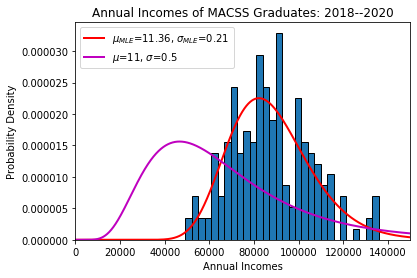

In [11]:
plt.hist(incomes, num_bins, normed=True, edgecolor='k')
plt.title('Annual Incomes of MACSS Graduates: 2018--2020')
plt.xlabel('Annual Incomes')
plt.ylabel('Probability Density')
plt.xlim([0, 150000])

plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu_MLE, sigma_MLE, 1, 150000),
         linewidth=2, color='r', label='$\mu_{MLE}$=11.36, $\sigma_{MLE}$=0.21')

plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu0, sigma0, 1, 150000), linewidth=2,
        color='m', label='$\mu$=11, $\sigma$=0.5')
plt.legend(loc='upper left')

plt.show()


In [12]:
# (d)

log_lik_h0 = log_lik_log_norm(incomes, mu0, sigma0, 0, 150000)
log_lik_mle = log_lik_log_norm(incomes, mu_MLE, sigma_MLE, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
print('MLE log likelihood', log_lik_mle)

LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('likelihood ratio value', LR_val)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)


hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.9343375116364
likelihood ratio value 276.37250884038167
chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [14]:
# e
p1 = 1 - sts.lognorm.cdf(100000, s=sigma_MLE, scale=np.exp(mu_MLE))
p2 = sts.lognorm.cdf(75000, s=sigma_MLE, scale=np.exp(mu_MLE))
print("Probability of earning more than $100,000 = ", p1)
print("Probability of earning less than $75,000 = ", p2)


Probability of earning more than $100,000 =  0.23755401366049256
Probability of earning less than $75,000 =  0.25964392494980326


In [15]:
# p2
df = pd.read_csv('data/sick.txt')
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [16]:
def norm_pdf(x, sigma):
    sigma = abs(sigma)
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-x**2/(2*sigma**2))

def log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    err = y - b0 - b1 * x1 - b2 * x2 - b3 * x3
    pdf_vals = norm_pdf(err, sigma)
    return sum(np.log(pdf_vals))

def crit_2(params, *args):
    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    return -log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma)




In [18]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.2, 0, 0, 0, 1)
y, x1, x2, x3 = df['sick'], df['age'], df['children'], df['avgtemp_winter']
parameters_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
res = opt.minimize(crit_2, parameters_init, (y, x1, x2, x3))
b0, b1, b2, b3, sigma = res.x
print('The estimates are as follows')
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)
print('b3 = ', b3)
print('sigma = ', sigma)



The estimates are as follows
b0 =  0.25164640278388967
b1 =  0.0129333575938667
b2 =  0.400501995083602
b3 =  -0.009991678288040044
sigma =  0.0030176814001361112


In [19]:
Hess = res.hess_inv
MLE = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma)
print('The value of the log likelihood function:', MLE)
print('The estimated variance covariance matrix of the estimates:\n', Hess)

The value of the log likelihood function: 876.8650466775352
The estimated variance covariance matrix of the estimates:
 [[ 8.90706793e-07  8.06260609e-09 -1.56588154e-07 -2.07633563e-08
  -4.60228535e-09]
 [ 8.06260609e-09  3.01149614e-09 -2.64071377e-08 -1.97683829e-09
  -1.56387591e-09]
 [-1.56588154e-07 -2.64071377e-08  2.66249132e-07  1.78858896e-08
   1.16317749e-08]
 [-2.07633563e-08 -1.97683829e-09  1.78858896e-08  1.62902060e-09
   1.10425761e-09]
 [-4.60228535e-09 -1.56387591e-09  1.16317749e-08  1.10425761e-09
   1.71208539e-08]]


In [ ]:
# b

In [52]:
b_0, b_1, b_2, b_3, sigma_1 = 1, 0, 0, 0, 0.1
log_lkh1 = log_lik_norm(y, x1, x2, x3, b_0, b_1, b_2, b_3, sigma_1)
log_lkmle = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma)
LR_val = 2 * (log_lkmle - log_lkh1)
pval_h1 = 1.0 - sts.chi2.cdf(LR_val, 2)

print('Hypothesis value log likelihood:', log_lkh1)
print('MLE log likelihood:', log_lkmle)
print('Likelihood ratio value:', LR_val)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h1)


Hypothesis value log likelihood: -2253.700688042125
MLE log likelihood: 876.8650466775352
Likelihood ratio value: 6261.13146943932
chi squared of H0 with 5 degrees of freedom p-value =  0.0
